In [2]:
import pandas as pd
all_file = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/solfile-v3/all_file.parquet", engine="fastparquet")
all_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94288 entries, 0 to 94287
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_code  94288 non-null  object
dtypes: object(1)
memory usage: 736.8+ KB


In [4]:
all_file.loc[0, "source_code"]

'pragma solidity ^0.4.20;\r\n\r\nlibrary SafeMath {\r\n    function add(uint a, uint b) internal pure returns (uint c) {\r\n        c = a + b;\r\n        require(c >= a);\r\n    }\r\n    function sub(uint a, uint b) internal pure returns (uint c) {\r\n        require(b <= a);\r\n        c = a - b;\r\n    }\r\n    function mul(uint a, uint b) internal pure returns (uint c) {\r\n        c = a * b;\r\n        require(a == 0 || c / a == b);\r\n    }\r\n    function div(uint a, uint b) internal pure returns (uint c) {\r\n        require(b > 0);\r\n        c = a / b;\r\n    }\r\n}\r\n\r\n\r\ncontract ERC20Interface {\r\n    function totalSupply() public constant returns (uint);\r\n    function balanceOf(address tokenOwner) public constant returns (uint balance);\r\n    function allowance(address tokenOwner, address spender) public constant returns (uint remaining);\r\n    function transfer(address to, uint tokens) public returns (bool success);\r\n    function approve(address spender, uint t

In [3]:
import pandas as pd
mask_function = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/data/mask_entire_function.parquet", engine="fastparquet")
mask_function.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   source_idx        0 non-null      object
 1   contract_name     0 non-null      object
 2   func_name         0 non-null      object
 3   masked_contract   0 non-null      object
 4   function          0 non-null      object
 5   func_requirement  0 non-null      object
dtypes: object(6)
memory usage: 132.0+ bytes


In [4]:
mask_entire_function = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/data/mask_entire_function.parquet", engine="fastparquet")
mask_entire_function.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   source_idx       657 non-null    object
 1   contract_name    657 non-null    object
 2   func_name        615 non-null    object
 3   masked_contract  657 non-null    object
 4   function         657 non-null    object
dtypes: object(5)
memory usage: 25.8+ KB


In [5]:
experiment = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/data/experiment.parquet", engine="fastparquet")
experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346379 entries, 0 to 346378
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   source_idx                346379 non-null  object
 1   contract_name             346379 non-null  object
 2   func_name                 328075 non-null  object
 3   masked_contract           346379 non-null  object
 4   function                  346379 non-null  object
 5   func_requirement          346379 non-null  object
 6   function_removed_comment  346379 non-null  object
dtypes: object(7)
memory usage: 18.5+ MB


In [9]:
with open("test.sol", "a") as f:
    for func in experiment[experiment["function"].str.contains("//")]["function"].iloc[0:5]:
        f.write(f"{func}\n---------------------------------------------------\n")

In [10]:
experiment[experiment["function"].str.contains("//")]["function"].iloc[0:5]


0     function SCT() {\r\n        balanceOf[msg.send...
1     function transfer(address _to, uint256 _value)...
2     function approve(address _spender, uint256 _va...
3     function transferFrom(address _from, address _...
11    function execute(\r\n    bytes calldata data,\...
Name: function, dtype: object

In [11]:
with open("test.sol", "a") as f:
    for i in [0, 1, 2, 3, 11]:
        f.write(f"{experiment.loc[i, 'function_removed_comment']}\n-------------------------------------\n")

# Test length of body function

In [46]:
only_mask_func_body_has_req = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/data/only_mask_func_body_has_req.parquet", engine="fastparquet")
only_mask_func_body_has_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346379 entries, 0 to 346378
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   source_idx                 346379 non-null  object
 1   contract_name              346379 non-null  object
 2   func_name                  328075 non-null  object
 3   masked_contract            346379 non-null  object
 4   func_body                  346379 non-null  object
 5   func_requirement           346379 non-null  object
 6   func_body_removed_comment  346379 non-null  object
dtypes: object(7)
memory usage: 18.5+ MB


In [47]:
only_mask_func_body_has_req["func_body_removed_comment"]

0         \n        balanceOf[msg.sender] = initialSuppl...
1         \n      require (_value > 0) ;\n        requir...
2         \n          allowance[msg.sender][_spender] = ...
3         \n        require (balanceOf[_from] >= _value)...
4                            \n  owner.transfer(amount);\n 
                                ...                        
346374    \n        require(_tokensToSell <= tokenSupply...
346375    \n        \n        address _customerAddress =...
346376    \n        uint256 _tokenPriceInitial = tokenPr...
346377    \n\n        uint256 tokens_ = (_tokens + 1e18)...
346378    \n        uint z = (x + 1) / 2;\n        y = x...
Name: func_body_removed_comment, Length: 346379, dtype: object

In [48]:
def body_len(func_body):
    special_chars = ";*{},():.=&~|^+/%*-><![]"
    for char in list(special_chars):
        func_body = func_body.replace(char, ' ')
    words = [word for word in func_body.split() if word]
    return len(words)

In [49]:
only_mask_func_body_has_req["body_len"] = only_mask_func_body_has_req["func_body_removed_comment"].apply(lambda x: body_len(x))

In [55]:
print(only_mask_func_body_has_req["body_len"].describe())
only_mask_func_body_has_req["body_len"].median()


count    346379.000000
mean         18.889915
std          30.743028
min           0.000000
25%           4.000000
50%          12.000000
75%          25.000000
max        9244.000000
Name: body_len, dtype: float64


12.0

In [50]:
counter = dict(only_mask_func_body_has_req["body_len"].value_counts())

In [51]:
mask_entire_function_has_req = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/data/mask_entire_function_has_req.parquet", engine="fastparquet")

In [52]:
def check_len(length):
    check = only_mask_func_body_has_req[only_mask_func_body_has_req["body_len"] == length].copy()
    with open("check.sol", "w") as f:
        for idx in check.index:
            f.write(f"{mask_entire_function_has_req.loc[idx, 'function']}\n--------------------------------------------------------------------------------\n")
    

In [65]:
check_len(11)

In [77]:
only_mask_func_body = pd.read_parquet("/home/hieuvd/lvdthieu/CodeGen/data/data/only_mask_func_body.parquet", engine="fastparquet")
only_mask_func_body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251883 entries, 0 to 1251882
Data columns (total 6 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   source_idx                 1251883 non-null  object
 1   contract_name              1251883 non-null  object
 2   func_name                  1180119 non-null  object
 3   masked_contract            1251883 non-null  object
 4   func_body                  1251883 non-null  object
 5   func_body_removed_comment  1251883 non-null  object
dtypes: object(6)
memory usage: 57.3+ MB


In [78]:
only_mask_func_body["body_len"] = only_mask_func_body["func_body_removed_comment"].apply(lambda x: body_len(x))


In [79]:
only_mask_func_body["body_len"].describe()

count    1.251883e+06
mean     1.850599e+01
std      2.873090e+01
min      0.000000e+00
25%      4.000000e+00
50%      1.000000e+01
75%      2.500000e+01
max      9.244000e+03
Name: body_len, dtype: float64

In [81]:
repeat_cnt = dict(only_mask_func_body["func_body_removed_comment"].value_counts())

In [82]:
only_mask_func_body["repeate_cnt"] = only_mask_func_body["func_body_removed_comment"].apply(lambda func: repeat_cnt[func])
only_mask_func_body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251883 entries, 0 to 1251882
Data columns (total 8 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   source_idx                 1251883 non-null  object
 1   contract_name              1251883 non-null  object
 2   func_name                  1180119 non-null  object
 3   masked_contract            1251883 non-null  object
 4   func_body                  1251883 non-null  object
 5   func_body_removed_comment  1251883 non-null  object
 6   body_len                   1251883 non-null  int64 
 7   repeate_cnt                1251883 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 76.4+ MB


In [83]:
only_mask_func_body = only_mask_func_body.sample(frac=1, random_state=11, ignore_index=True)

In [84]:
only_mask_func_body.drop_duplicates(subset=["func_body_removed_comment"], inplace=True, ignore_index=True)

In [85]:
only_mask_func_body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308807 entries, 0 to 308806
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   source_idx                 308807 non-null  object
 1   contract_name              308807 non-null  object
 2   func_name                  279233 non-null  object
 3   masked_contract            308807 non-null  object
 4   func_body                  308807 non-null  object
 5   func_body_removed_comment  308807 non-null  object
 6   body_len                   308807 non-null  int64 
 7   repeate_cnt                308807 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 18.8+ MB


In [86]:
only_mask_func_body["repeate_cnt"].describe()

count    308807.000000
mean          4.053933
std          92.717895
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max       16687.000000
Name: repeate_cnt, dtype: float64

In [87]:
len(only_mask_func_body[only_mask_func_body["repeate_cnt"] > 1])

72876

In [93]:
def repeat_stats(df):
    barr = [1, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 4000, 8000, 17000]
    dist = []
    for i in range(len(barr) - 1):
        dist.append(len(df[(df["repeate_cnt"]>barr[i]) & (df["repeate_cnt"]<=barr[i+1])]))
    return dist

In [94]:
repeat_stats(only_mask_func_body)

[58292, 6970, 3493, 2137, 924, 501, 345, 104, 55, 27, 19, 9]

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
function_overview = [
    {"range":"2-5","count": 58292},
    {"range":"6-10","count": 6970},
    {"range":"11-20","count": 3493},
    {"range":"21-50","count": 2137},
    {"range":"51-100","count": 924},
    {"range":"101-200","count": 501},
    {"range":"201-500","count": 345},
    {"range":"501-1000","count": 104},
    {"range":"1001-2000","count": 55},
    {"range":"2001-4000","count": 27},
    {"range":"4001-8000", "count": 19},
    {"range":"8001-17000", "count": 9}
]

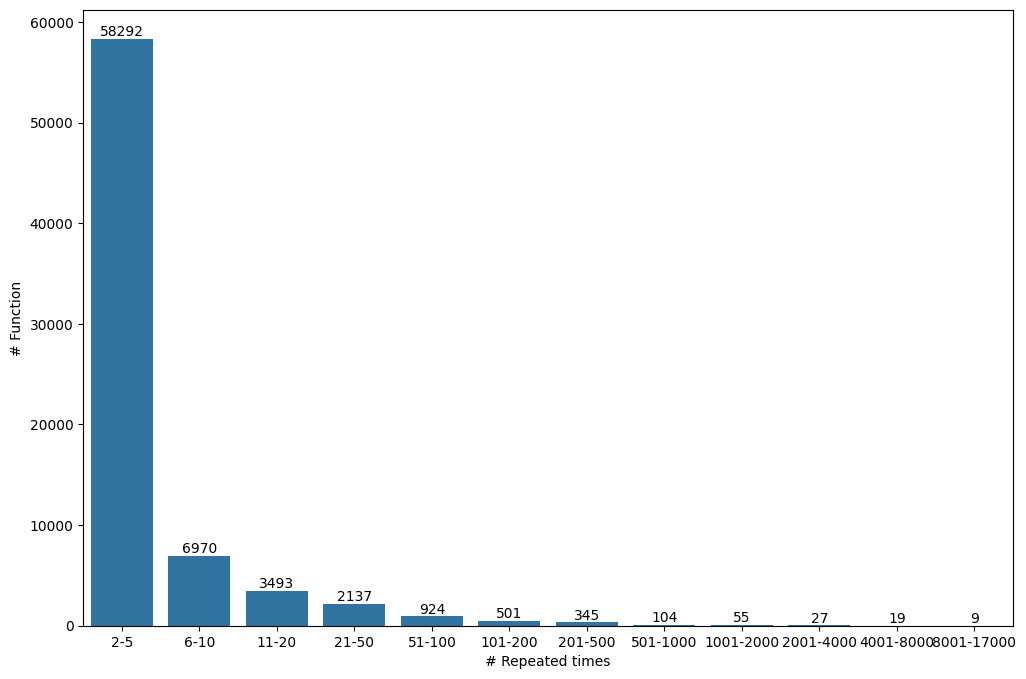

In [101]:
function_overview = pd.DataFrame(function_overview)

plt.figure(figsize=(12,8))
plt.ylabel("# Function")
plt.xlabel("# Repeated times")
ax = sns.barplot(function_overview, x="range", y="count")
for i in ax.containers:
    ax.bar_label(i,)